In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statistics

In [5]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
np.mean(df['total_bill'])

19.78594262295082

In [8]:
np.median(df['total_bill'])

17.795

In [9]:
np.mode(df['total_bill']) # no mode in numpy so use stat

AttributeError: ignored

In [11]:
statistics.mode(df['total_bill'])

13.42

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

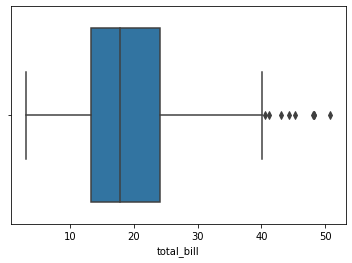

In [13]:
sns.boxplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

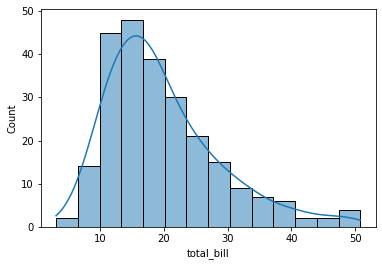

In [15]:
sns.histplot(df['total_bill'],kde=True) 

above distribution log normal distribution

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

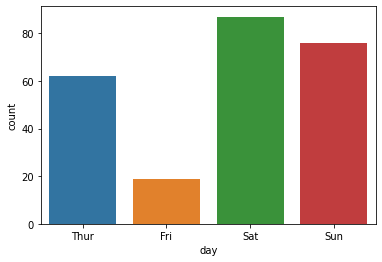

In [16]:
sns.countplot(df['day'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

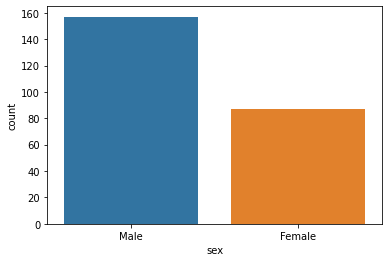

In [17]:
sns.countplot(df['sex'])

<AxesSubplot:xlabel='time', ylabel='count'>

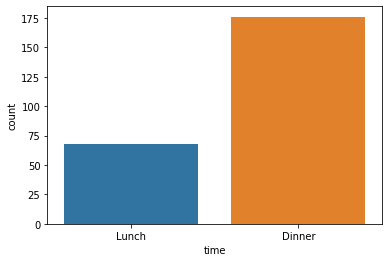

In [19]:
sns.countplot(df['time'])

In [30]:
np.percentile(df['total_bill'],[25,50,75])

array([13.3475, 17.795 , 24.1275])

In [31]:
IQR = 24.1275 - 13.3475
IQR

10.780000000000001

In [33]:
df1 = sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
np.mean(df1["sepal_length"])

5.843333333333334

In [35]:
np.median(df1["sepal_length"])

5.8

In [36]:
statistics.mode(df1['sepal_length'])

5.0

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

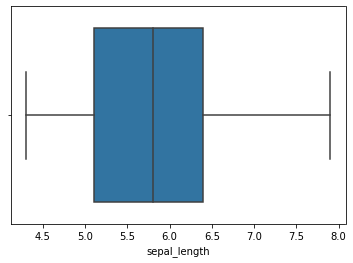

In [37]:
sns.boxplot(df1['sepal_length'])

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

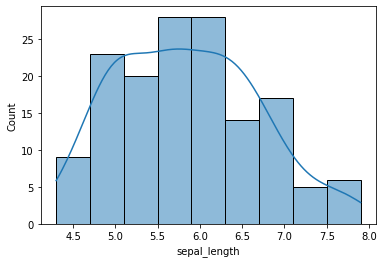

In [38]:
sns.histplot(df1['sepal_length'],kde=True)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

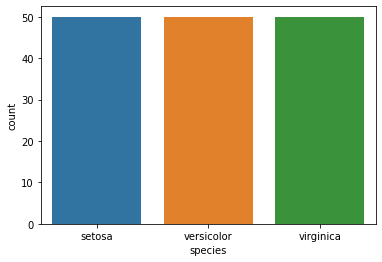

In [39]:
sns.countplot(df1['species'])

In [40]:
np.percentile(df1['sepal_length'],[25,50,75])

array([5.1, 5.8, 6.4])

In [41]:
# work on new data 
# Define our dataset
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

<AxesSubplot:ylabel='Count'>

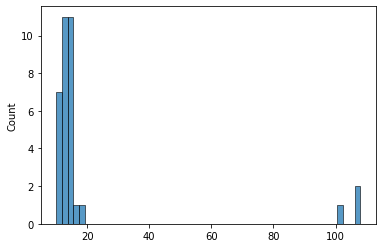

In [44]:
sns.histplot(dataset)

In [46]:
# outlier - z-score, IQR
outlier = []
def detect_outlier(data):
  thresold = 3 ##3 means standard deviation
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score)>thresold:
      outlier.append(i)
  return outlier


In [47]:
detect_outlier(dataset)

[102, 107, 108]

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

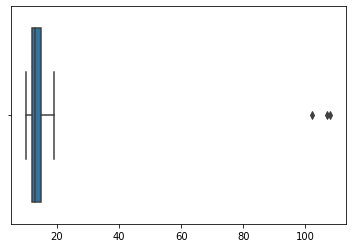

In [48]:
sns.boxplot(dataset)

In [ ]:
# sort the data 
dataset

## outlier using IQR 
1. sort the data 
2. calculate Q1 AND Q3 
3. FIND the IQR
4. Find the lower fence Q1-1.5IQR
5. Find the upper fence

In [50]:
# sort the dataset
dataset = sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [52]:
# find the q1 and q3 
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)

12.0 15.0


In [53]:
iqr = q3 - q1
iqr

3.0

In [54]:
## find the lower and higher fence
lower_fence = q1-1.5*(iqr)
higher_fence = q3+1.5*iqr
print(lower_fence,higher_fence)

7.5 19.5


In [55]:
for i in dataset:
  if i<lower_fence or i>higher_fence:
    print(i)

102
107
108
